In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../src")
import model.sdes as sdes
from plot.plot import plot_mnist_digits
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
out_path = "/gstore/home/tsenga5/branched_diffusion/figures/branched_diffusion_schematic"

os.makedirs(out_path, exist_ok=True)

In [3]:
# Define device
if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = "cpu"

In [4]:
classes = [0, 4, 9]
input_shape = (1, 28, 28)

In [5]:
sde = sdes.VariancePreservingSDE(0.1, 20, input_shape)
t_limit = 1

### Show the forward-diffusion process

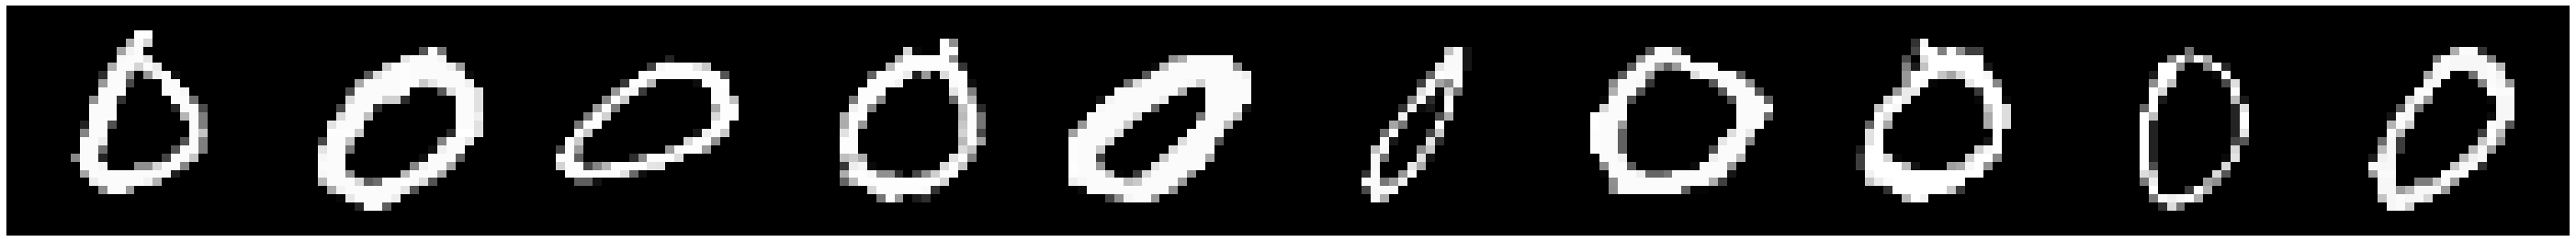

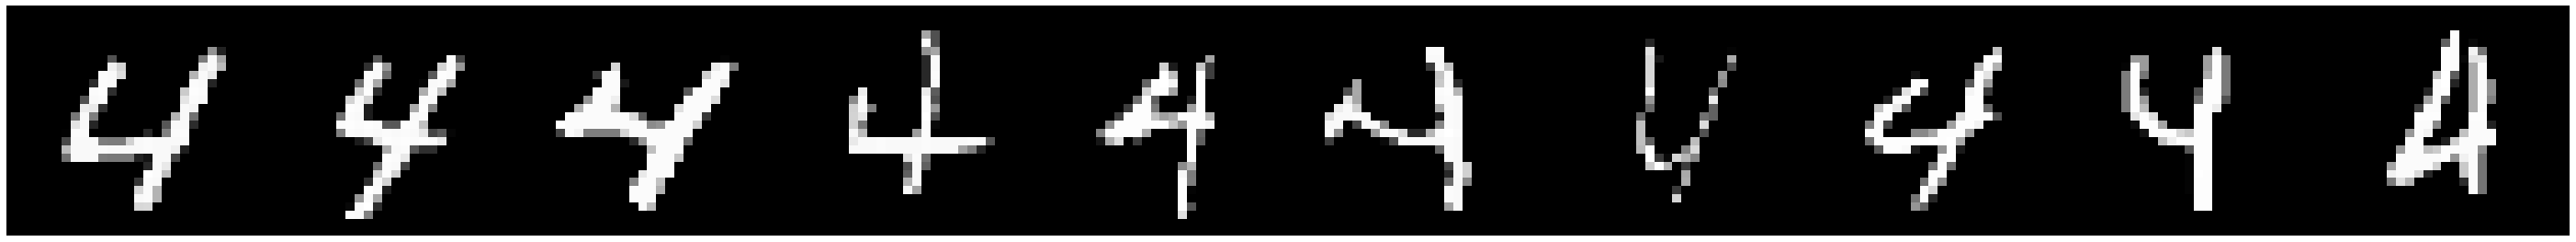

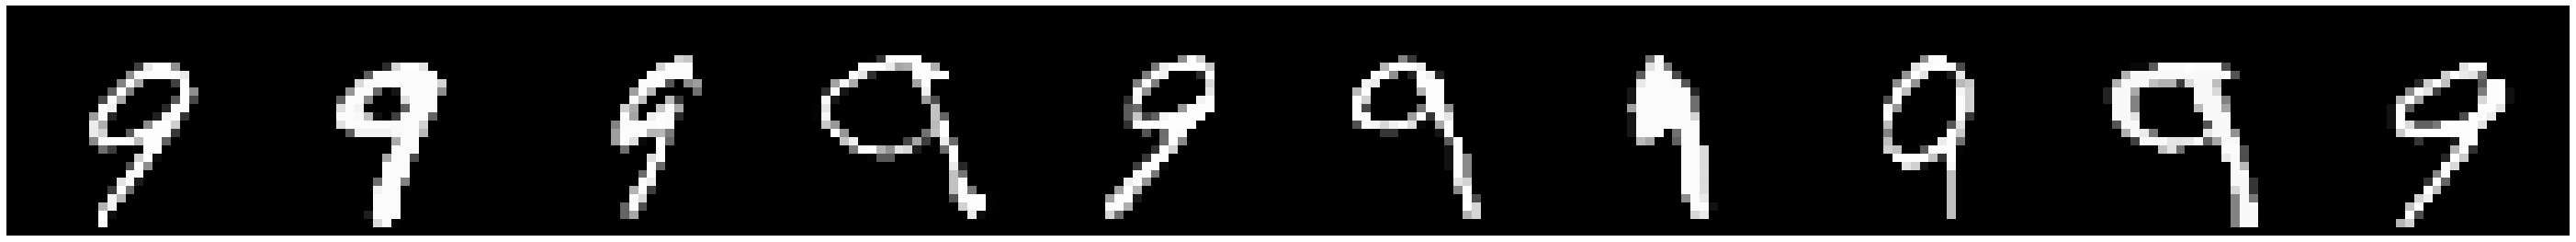

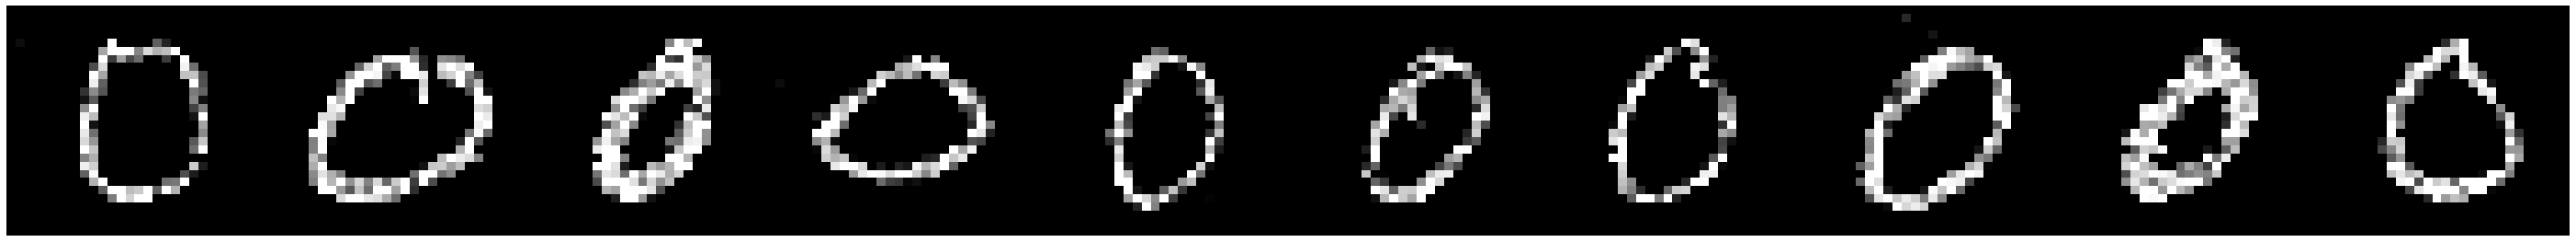

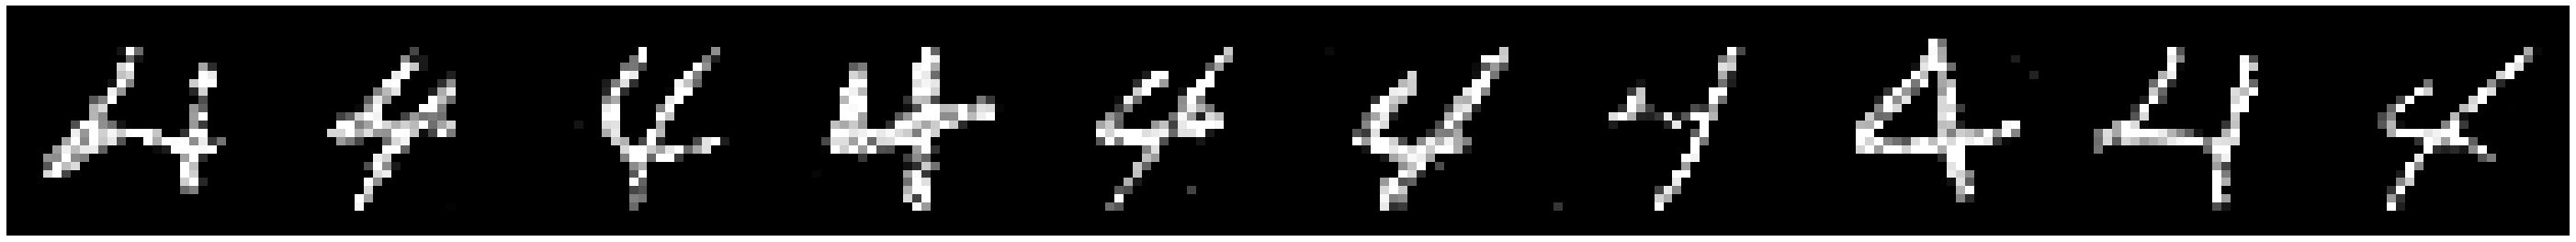

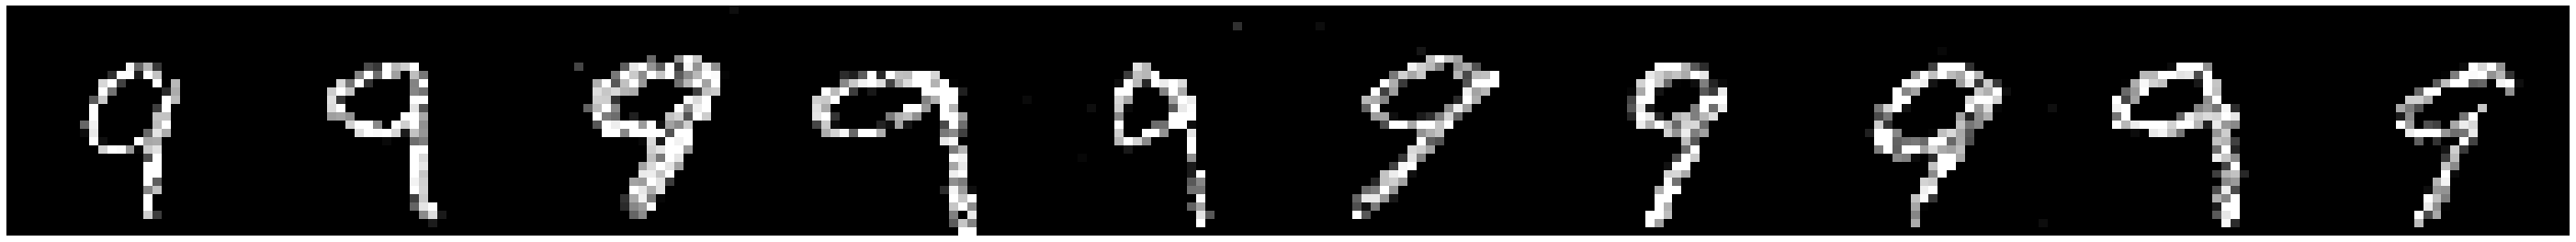

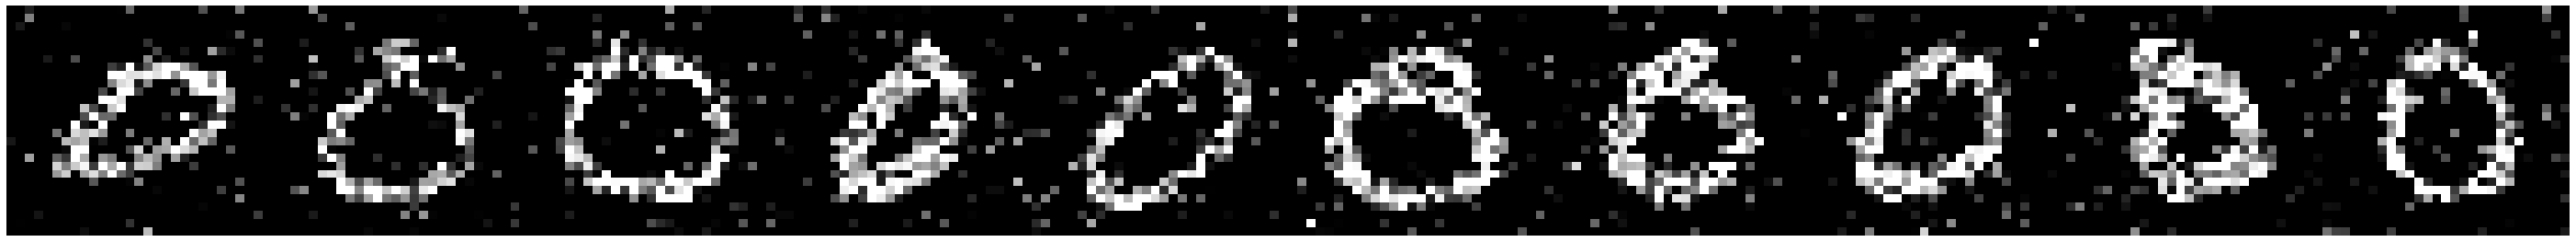

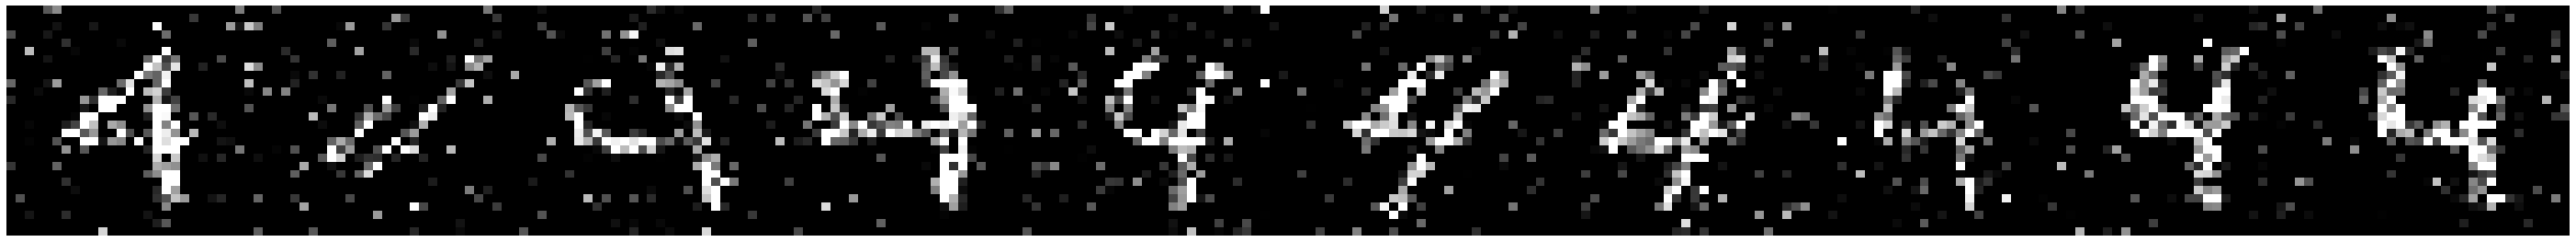

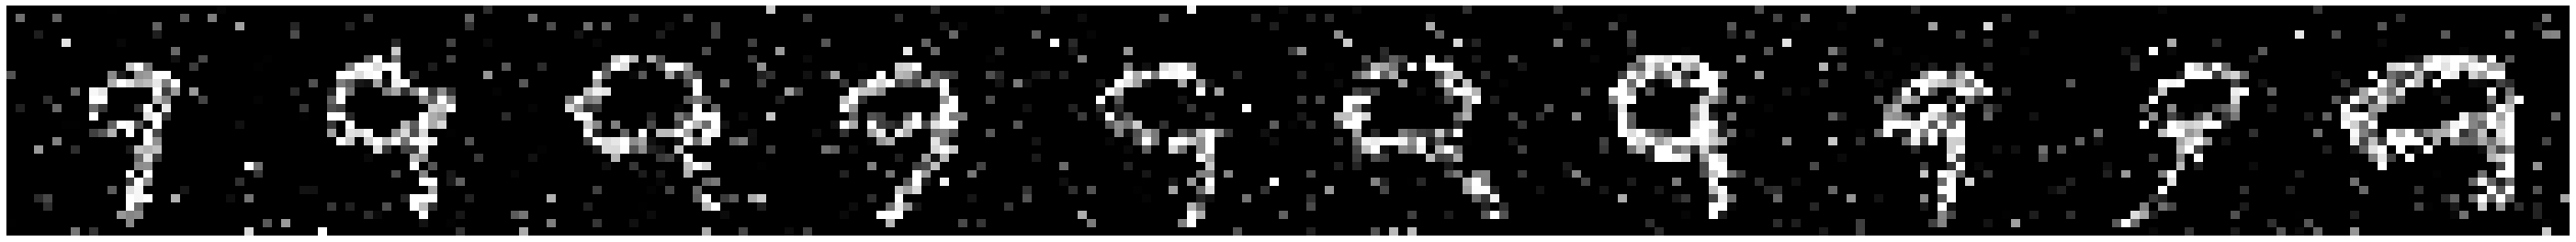

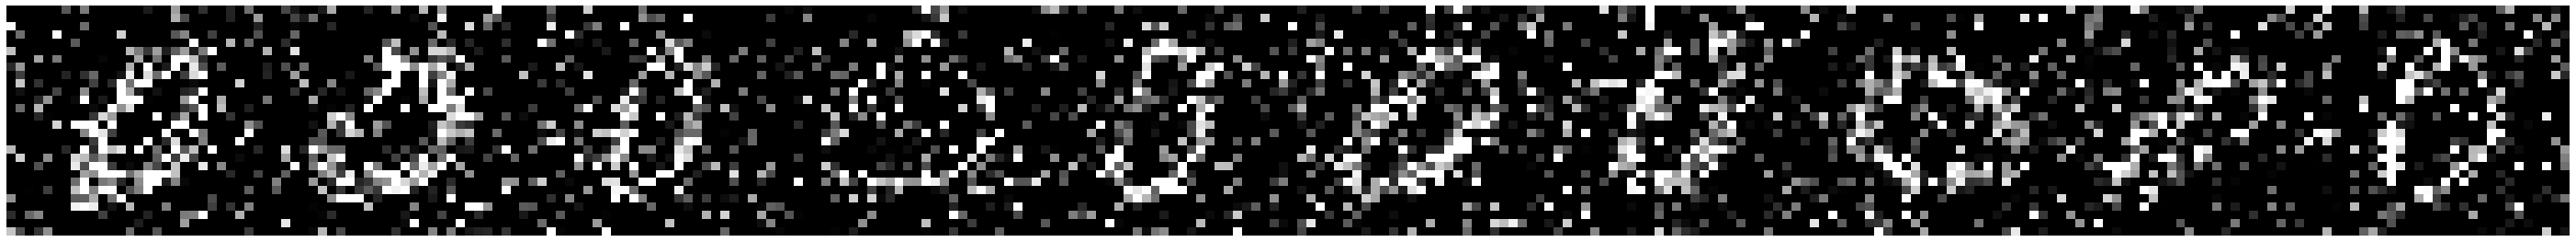

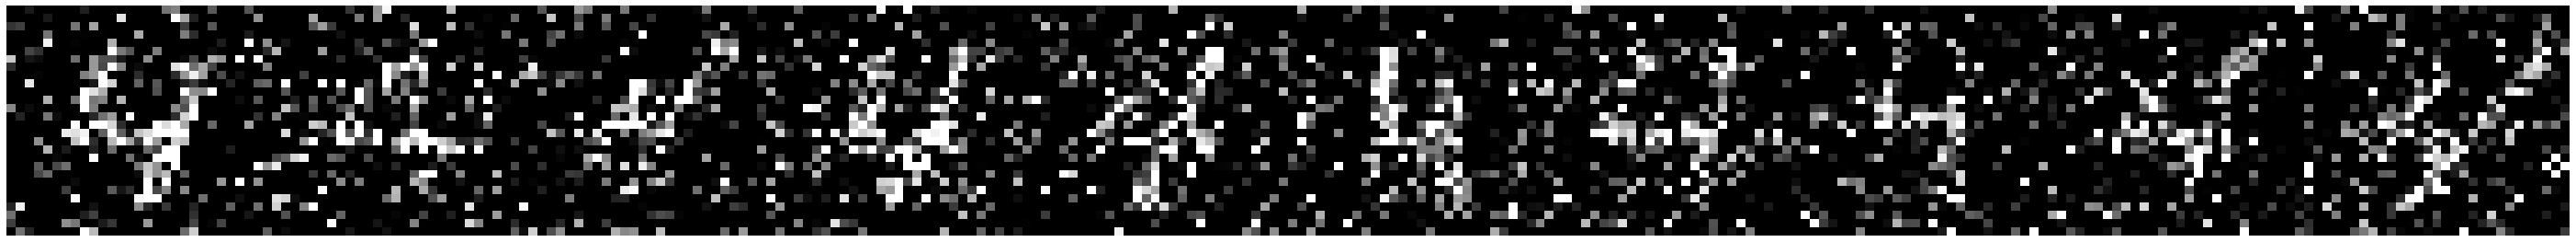

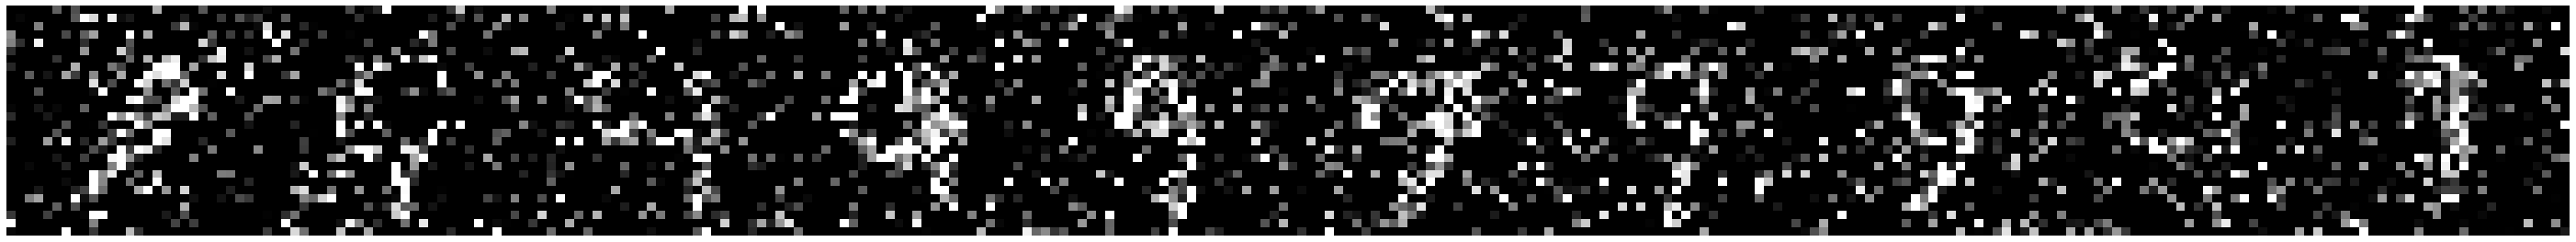

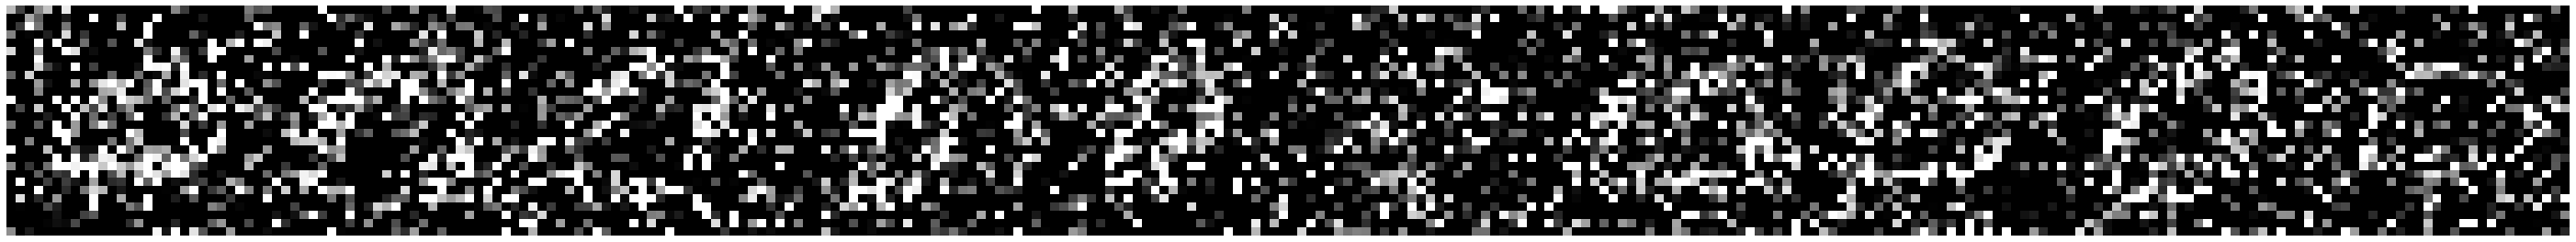

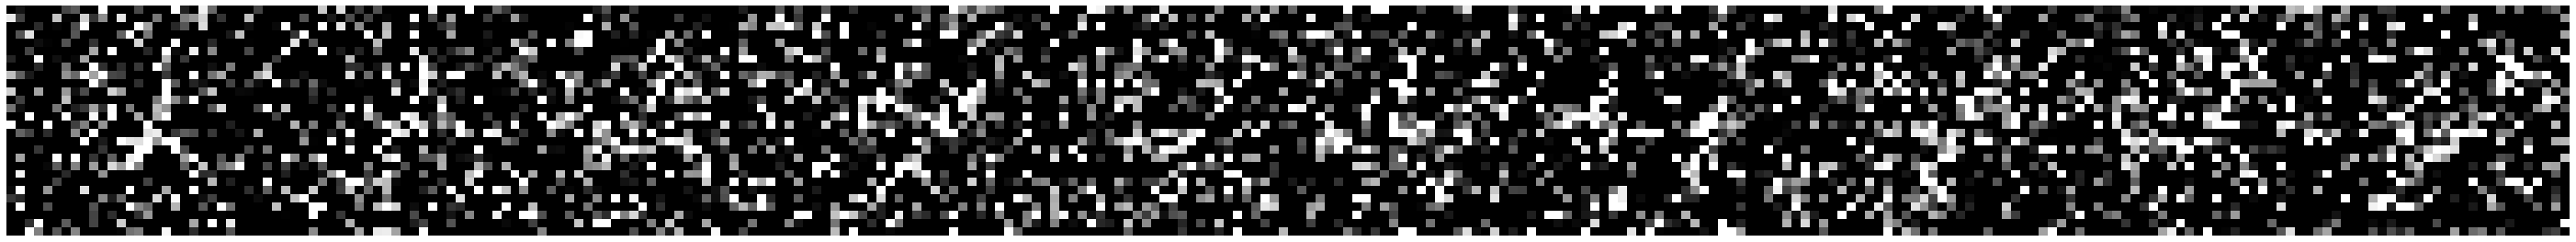

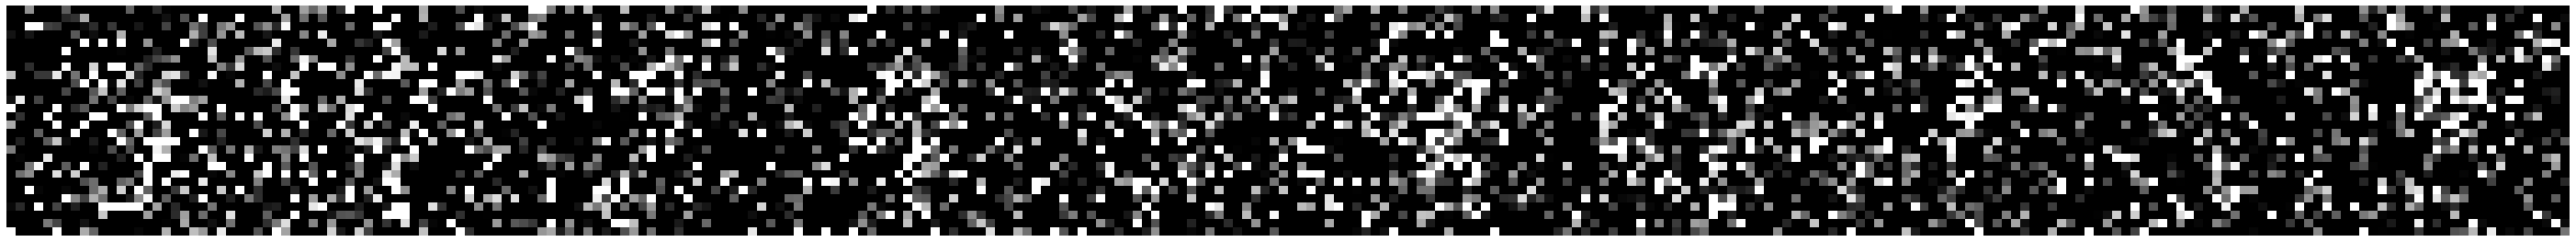

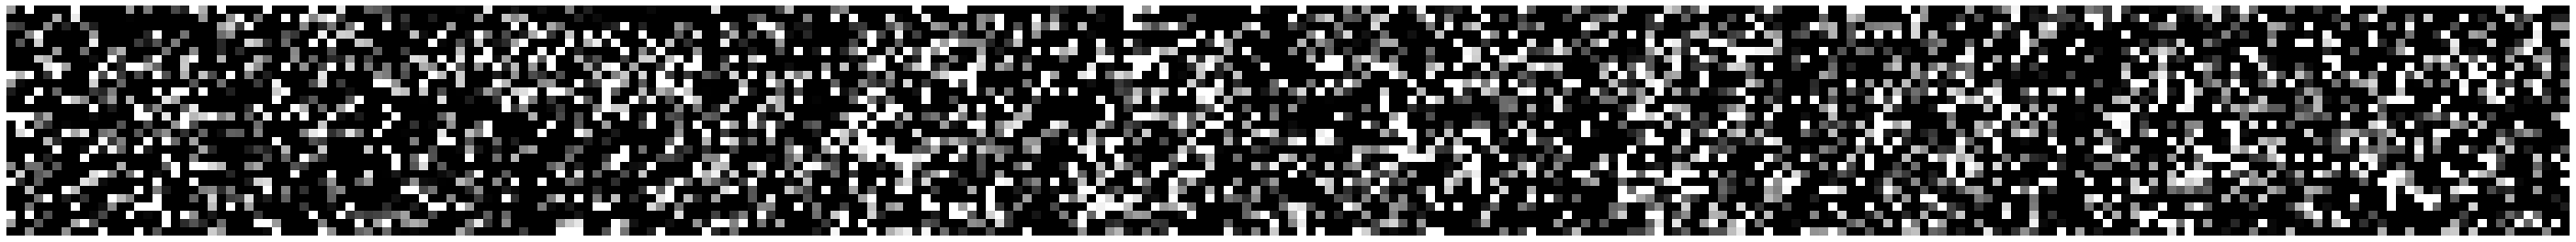

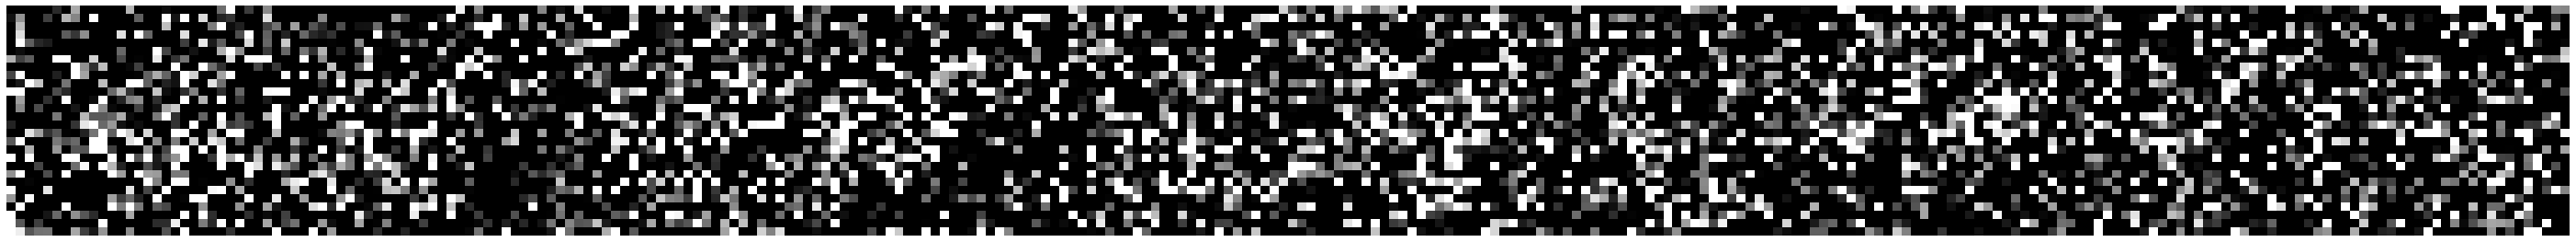

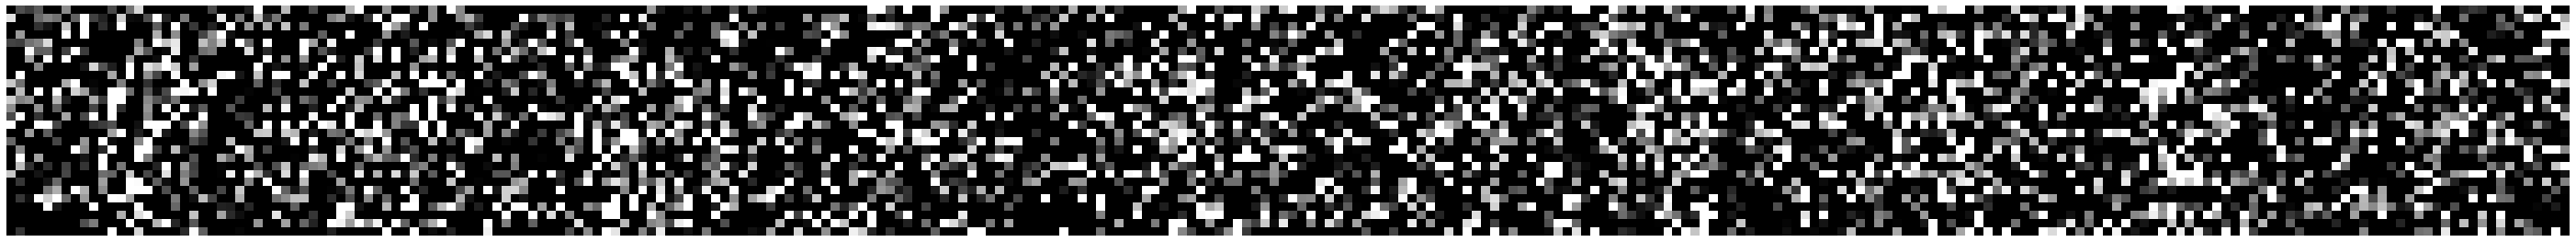

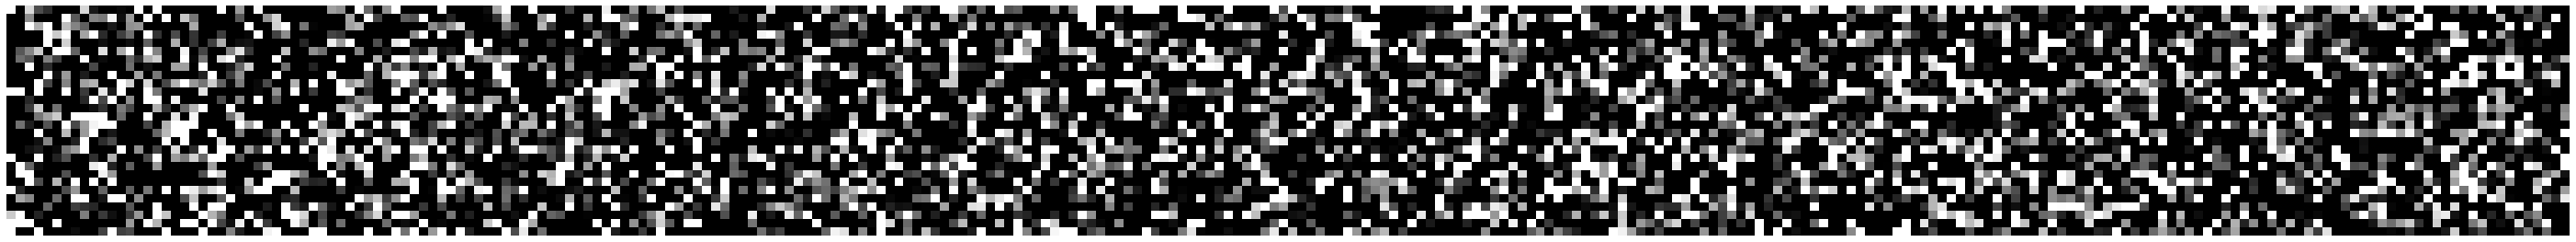

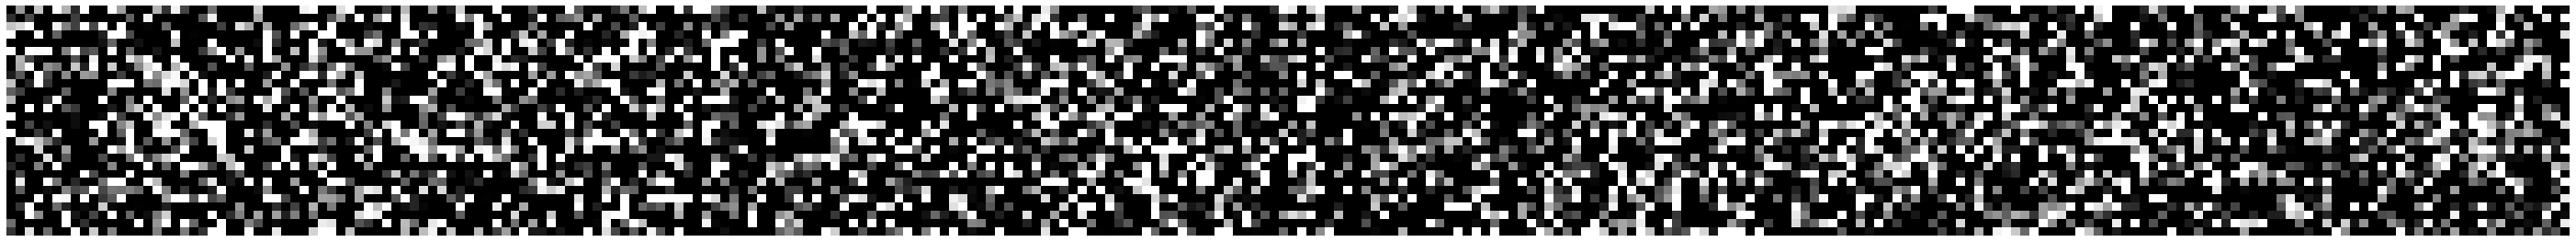

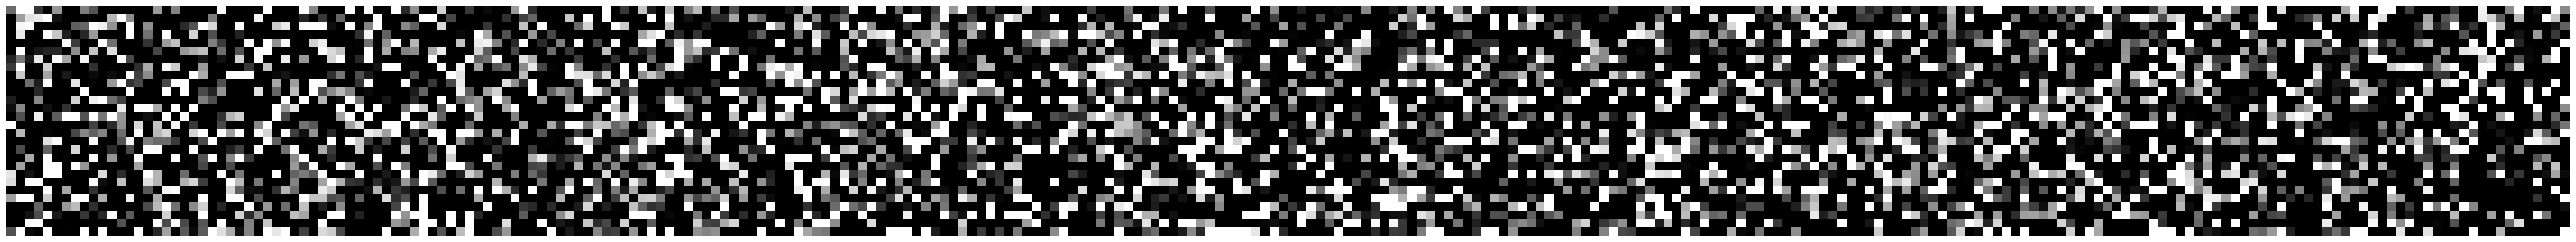

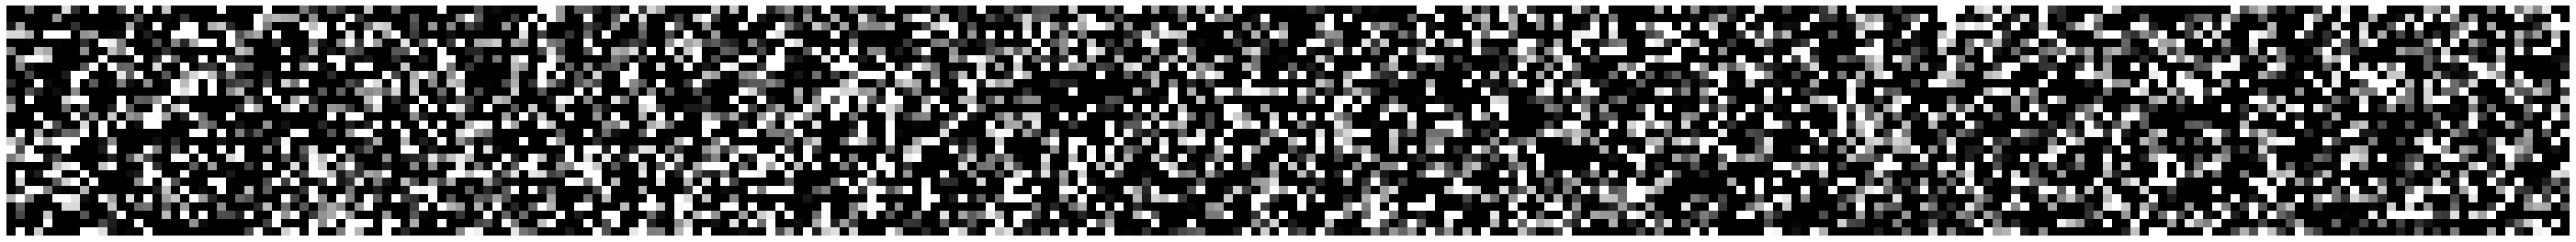

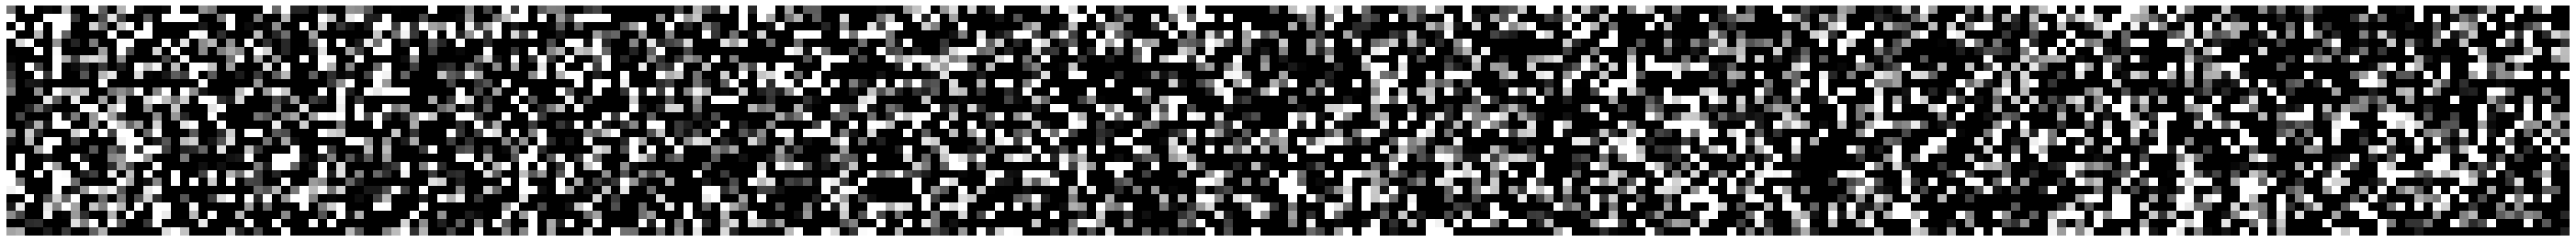

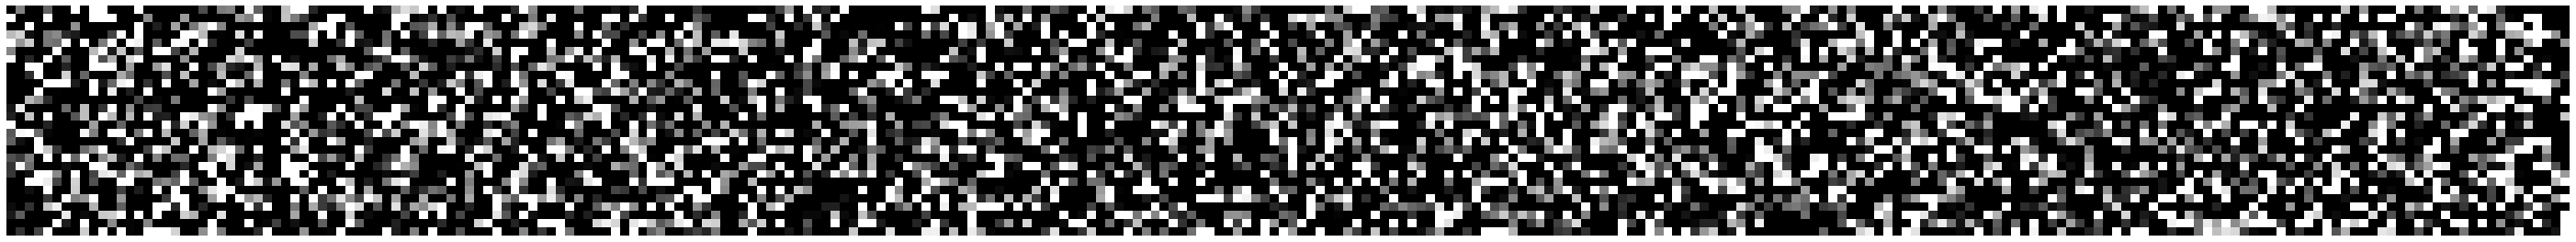

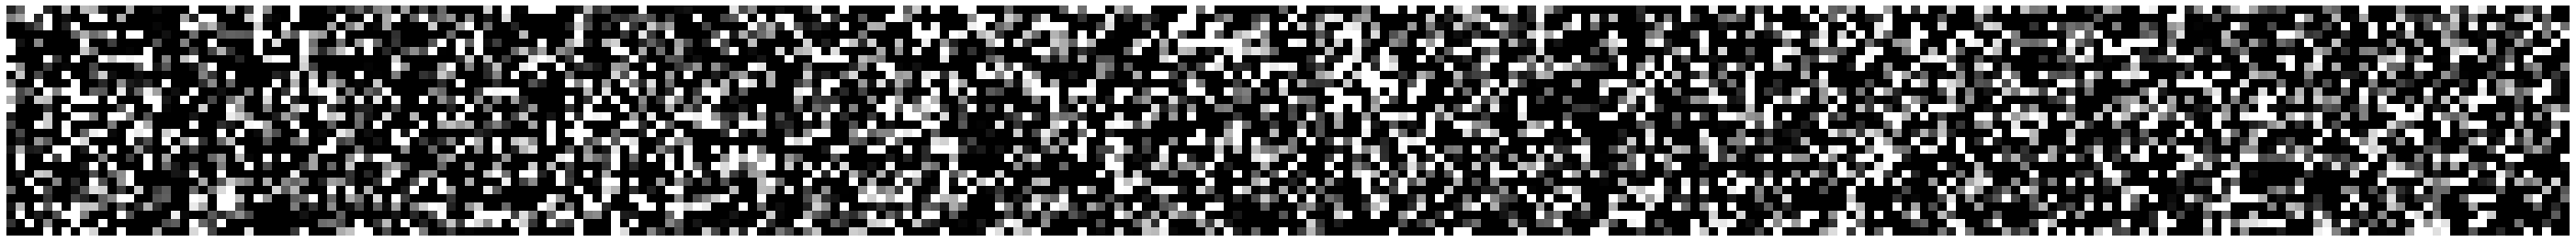

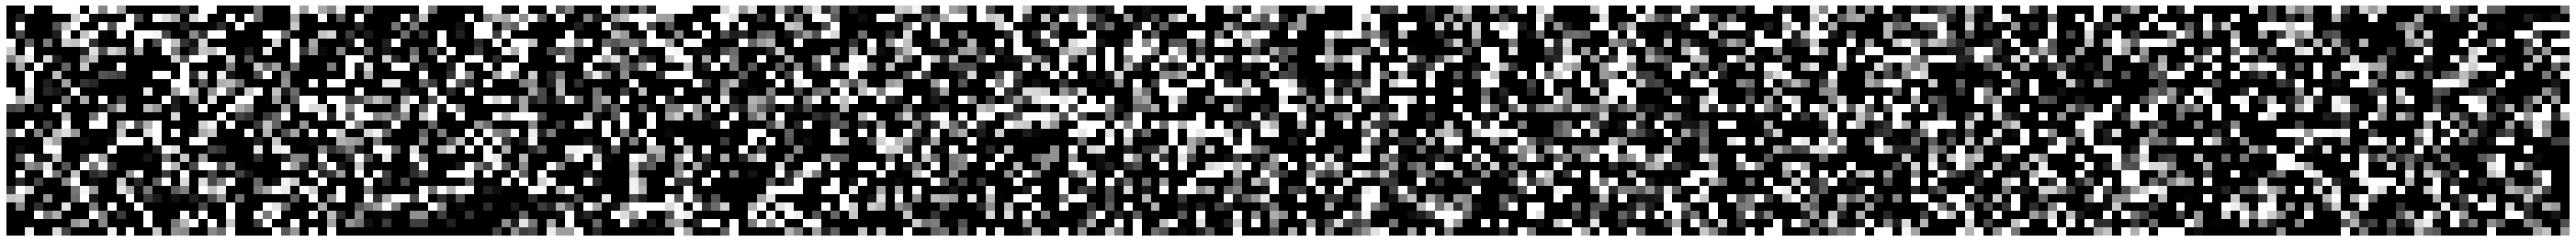

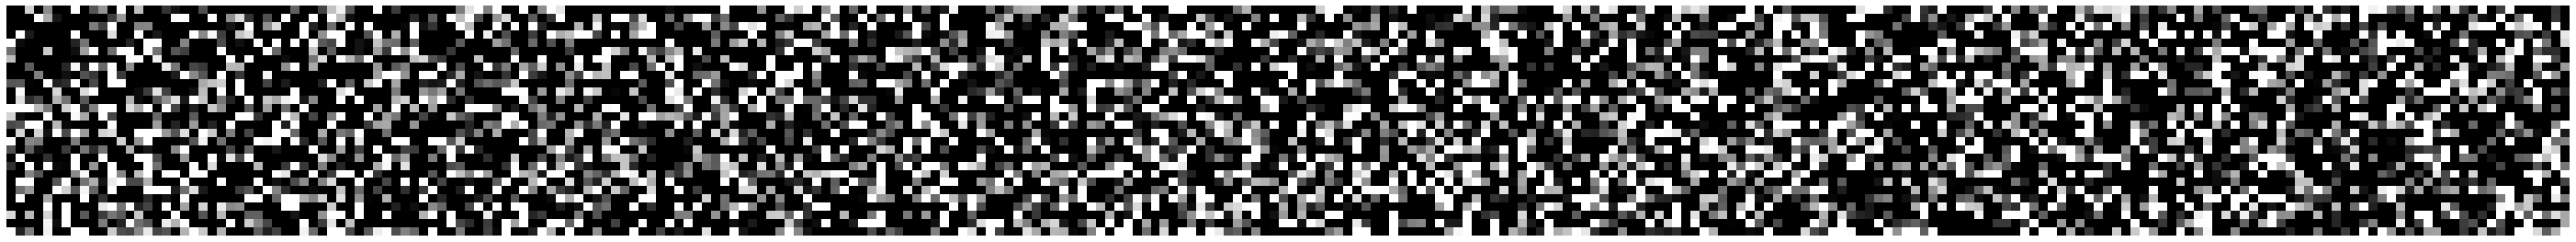

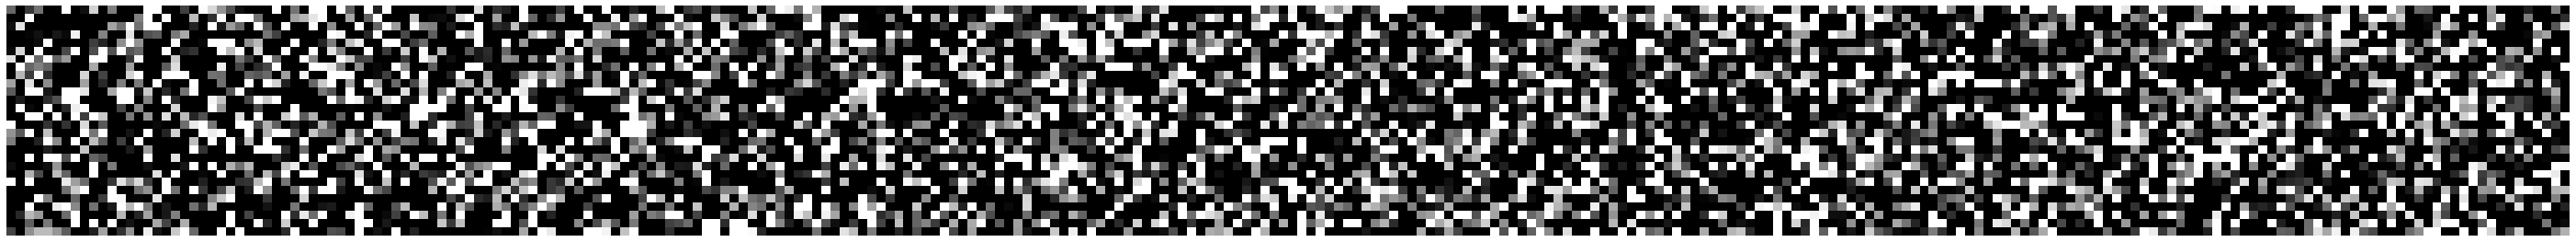

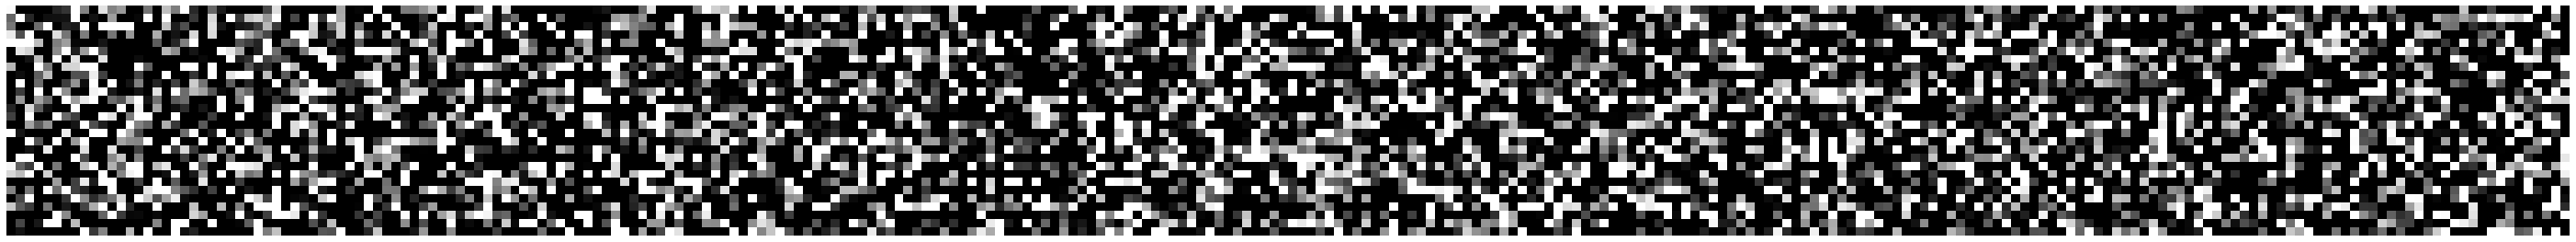

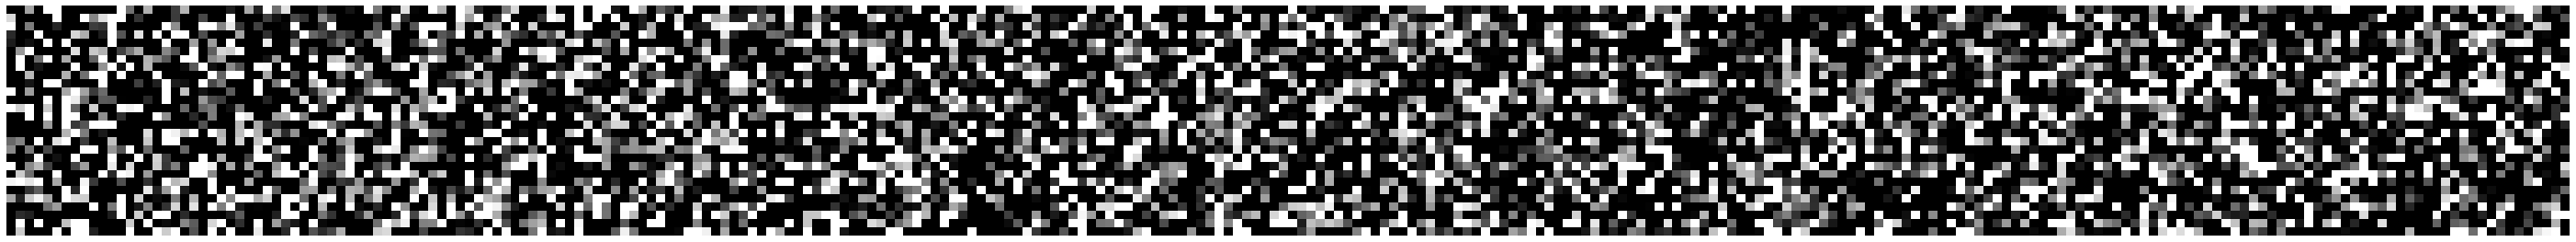

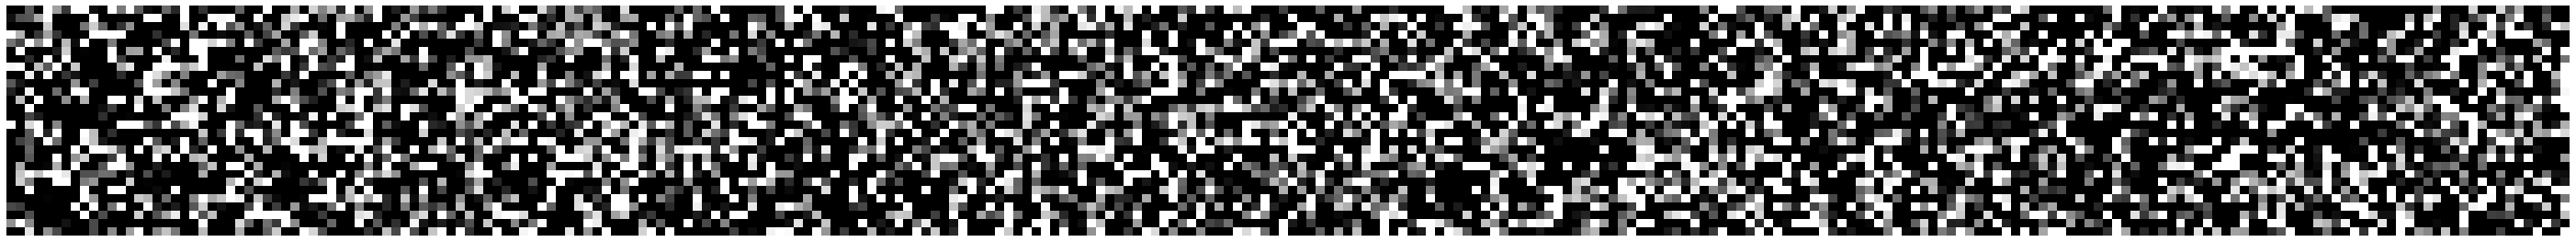

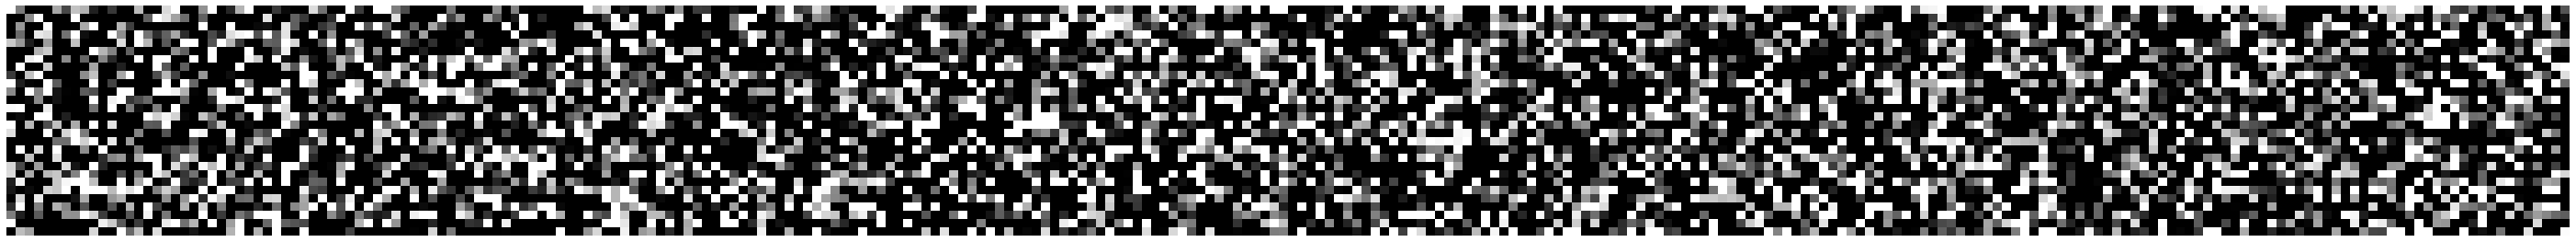

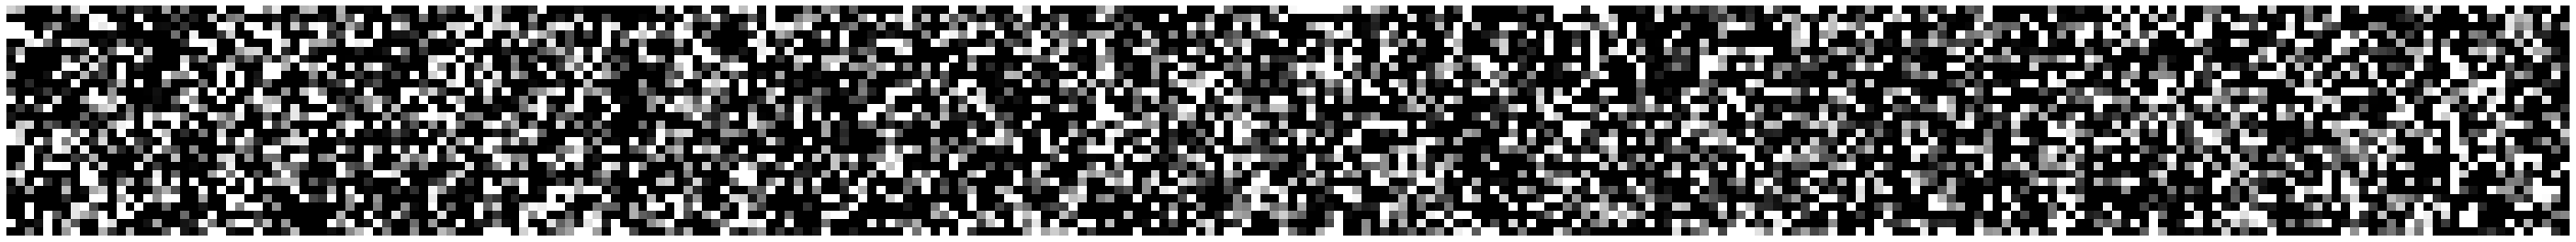

In [6]:
# Show some images after running the SDE forward for different times
for t in np.linspace(0, 1, 10 + 1):
    for c in classes:
        dataset = torchvision.datasets.MNIST(
            "/gstore/data/resbioai/tsenga5/datasets", train=True, transform=(lambda img: (np.asarray(img)[None] / 256 * 2) - 1)
        )

        # Limit classes
        inds = np.isin(dataset.targets, [c])
        dataset.data = dataset.data[inds]
        dataset.targets = dataset.targets[inds]

        data_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2)
        
        x0, _ = next(iter(data_loader))
        x0 = x0.cpu().numpy()

        x0 = torch.tensor(x0).to(DEVICE)
        xt, score = sde.forward(x0, torch.full(x0.shape[:1], t).to(DEVICE))
        fig = plot_mnist_digits(xt.cpu().numpy(), grid_size=(10, 1), scale=5)
        fig.savefig(
            os.path.join(out_path, "%d_t%.2f.svg" % (c, t)),
            format="svg"
        )
        plt.show()